In [295]:
import math

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [296]:

COLUMN_NAME_FOR_RECORD_NUMBER = 'Unnamed: 0'
COLUMN_NAME_FOR_DATE = 'Unnamed: 1'

LINE_NUMBER_FOR_UNITS_OF_MEASUREMENT = 1

COLUMN_AXIS = 1
ROW_AXIS = 0

BASE_OF_LOGARITHM_FOR_ENTROPY = 2

TARGET_VARIABLES = ['G_total(кг/с)', 'КГФ(г/м3)', 'КГФ(т/тыс.м3)']


def add_unit_of_measurement_to_column_names(df: pd.DataFrame) -> pd.DataFrame:
    columns = list(df)
    new_columns = []
    for col in range(0, len(list(df))):
        measurement = "".join(df.iloc[0, col].split())
        new_column_name = columns[col] + '(' + measurement + ')'
        if new_column_name not in new_columns:
            new_columns.append(new_column_name)
            continue
        new_columns.append('%s%s%s' % (new_column_name, '_', str(new_columns.count(new_column_name))))

    df = df.drop(LINE_NUMBER_FOR_UNITS_OF_MEASUREMENT)
    df.columns = new_columns

    return df


def fix_incorrect_number_format(df: pd.DataFrame) -> pd.DataFrame:
    df = df.replace(',', '.', regex=True)
    for col in df.columns:
        df[col] = df[col].astype(str).str.extract(r'(\d*[\.]?\d*)')
    return df


def delete_uninformative_data(df: pd.DataFrame) -> pd.DataFrame:
    df = df.drop(columns=[COLUMN_NAME_FOR_RECORD_NUMBER, COLUMN_NAME_FOR_DATE])
    return df


def format_data_frame(df: pd.DataFrame) -> pd.DataFrame:
    df = delete_uninformative_data(df)

    # set the location of the first row with columns
    df.columns = df.iloc[0]
    # remove first row from the dataframe rows
    df = df[1:]

    df = add_unit_of_measurement_to_column_names(df)

    df = fix_incorrect_number_format(df)
    df = df.replace('', None)
    df = df.astype(float)

    return df


data_frame = pd.read_excel('data.xlsx', sheet_name='VU')
data_frame = format_data_frame(data_frame)
data_frame

C:\Users\Elizaveta\PycharmProjects\lab_1\venv\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


Глубина манометра(м)  Dшт(мм)  Руст(бара)  Рзаб(бара)  Pлин(бара)  \
2                  3576.3     7.94  249.600000  370.100000  101.800000   
3                  3576.3     9.53  233.500000  364.600000  101.300000   
4                  3576.3    11.11  213.400000  357.100000  101.600000   
5                  3576.3    12.70  191.600000  347.400000   98.400000   
6                  3576.3    14.29  171.900000  337.700000   99.200000   
7                  3576.3     9.53  199.500000  286.400000  106.361669   
8                  3590.0     7.93  284.317950  391.823775         NaN   
9                  3590.0    11.11  270.943050  384.224400         NaN   
10                 3590.0    14.28  245.510475  371.912399         NaN   
11                 3590.0    17.46  209.641425  346.192061         NaN   
12                 3667.0     7.94  252.000000  354.333525  102.932004   
13                 3667.0     9.53  250.000000  350.200000  103.186902   
14                 3667.0    11.11  240.000000  344.000000  105.671499   
15                 3667.0    12.70  228.000000  336.700000  108.100063   
16                 3579.0     7.94  259.608696  365.860000  103.471415   
17                 3579.0     9.53  239.423077  342.270000  103.200466   
18                 3579.0    11.11  213.428571  312.270000  103.187111   
19                 3579.0    12.70  194.242424  291.740000  103.229928   
20                 3579.0    14.29  166.000000  263.030000  107.377560   
21                 3582.5     9.53  206.000000  292.000000  105.507978   
22                 3653.0     7.94  323.100000  440.500000  108.886435   
23                 3653.0     9.53  272.692308  388.700000   89.652839   
24                 3653.0    12.70  202.153846  308.800000   97.877045   
25                 3653.0    14.29  165.846154  270.500000   79.952750   
26                 3653.0    15.88  138.866667  239.300000   80.732932   
27                 3653.0    14.29  149.888889  251.300000   73.306638   
28                 3653.0    11.11  191.411765  296.800000   76.572068   
29                 3650.0     7.94  337.108108  458.600000   91.045545   
30                 3650.0     9.53  325.842105  452.800000   97.787995   
31                 3650.0    12.70  299.555556  437.300000  103.108052   
32                 3650.0    14.29  280.333333  426.200000  107.062626   
33                 3650.0    15.87  256.210526  414.000000  109.784475   
34                 3650.0    14.29  271.473684  414.800000  108.633163   
35                 3650.0    11.11  297.677419  424.500000  100.126341   
36                 3653.0     9.53  298.571429  403.400000  111.381880   
37                 3653.0    11.11  285.650000  399.200000  121.682930   
38                    NaN    14.29  221.800000         NaN  107.555531   
39                 3572.0     6.35  251.286000  341.500000  106.000000   
40                 3572.0     9.53  237.100500  330.000000  105.900000   
41                 3572.0    11.11  222.915000  316.000000  108.900000   
42                 3572.0    12.70  222.915000  301.600000  101.700000   
43                 3588.5     7.94  258.000000  359.900000  100.200000   
44                 3588.5     9.53  250.300000  346.900000   98.900000   
45                 3588.5    11.11  232.000000  330.500000   94.500000   
46                 3588.5    12.70  214.200000  314.200000   96.900000   
47                 3588.5    14.29  193.000000  297.500000   98.200000   
48                 3588.5    12.70  206.000000  306.900000   97.200000   
49                    NaN     9.53  215.000000         NaN  100.369642   
50                 3559.5     6.35  307.014750  399.423150   99.228073   
51                 3559.5     9.53  289.789500  390.810525  100.820932   
52                 3559.5    12.70  264.356925  376.422375  101.831624   
53                 3559.5    14.29  245.105175  366.695175  101.264891   
54                 3570.0     7.94  277.916667  381.260000   89.587422   
55       

In [297]:
COEF_FOR_KGF_MERGE = 0.001


def merge_columns(df: pd.DataFrame, coefficient: float, remaining_column: str,
                  column_to_be_deleted: str) -> pd.DataFrame:
    for i in range(0, len(df)):
        if pd.isnull(df.iloc[i][remaining_column]):
            df.iloc[i][remaining_column] = float(df.iloc[i][column_to_be_deleted]) * coefficient
    df = df.drop(column_to_be_deleted, axis=COLUMN_AXIS)
    return df


data_frame = merge_columns(data_frame, COEF_FOR_KGF_MERGE, 'КГФ(т/тыс.м3)', 'КГФ(г/м3)')
TARGET_VARIABLES.remove('КГФ(г/м3)')
data_frame

Глубина манометра(м)  Dшт(мм)  Руст(бара)  Рзаб(бара)  Pлин(бара)  \
2                  3576.3     7.94  249.600000  370.100000  101.800000   
3                  3576.3     9.53  233.500000  364.600000  101.300000   
4                  3576.3    11.11  213.400000  357.100000  101.600000   
5                  3576.3    12.70  191.600000  347.400000   98.400000   
6                  3576.3    14.29  171.900000  337.700000   99.200000   
7                  3576.3     9.53  199.500000  286.400000  106.361669   
8                  3590.0     7.93  284.317950  391.823775         NaN   
9                  3590.0    11.11  270.943050  384.224400         NaN   
10                 3590.0    14.28  245.510475  371.912399         NaN   
11                 3590.0    17.46  209.641425  346.192061         NaN   
12                 3667.0     7.94  252.000000  354.333525  102.932004   
13                 3667.0     9.53  250.000000  350.200000  103.186902   
14                 3667.0    11.11  240.000000  344.000000  105.671499   
15                 3667.0    12.70  228.000000  336.700000  108.100063   
16                 3579.0     7.94  259.608696  365.860000  103.471415   
17                 3579.0     9.53  239.423077  342.270000  103.200466   
18                 3579.0    11.11  213.428571  312.270000  103.187111   
19                 3579.0    12.70  194.242424  291.740000  103.229928   
20                 3579.0    14.29  166.000000  263.030000  107.377560   
21                 3582.5     9.53  206.000000  292.000000  105.507978   
22                 3653.0     7.94  323.100000  440.500000  108.886435   
23                 3653.0     9.53  272.692308  388.700000   89.652839   
24                 3653.0    12.70  202.153846  308.800000   97.877045   
25                 3653.0    14.29  165.846154  270.500000   79.952750   
26                 3653.0    15.88  138.866667  239.300000   80.732932   
27                 3653.0    14.29  149.888889  251.300000   73.306638   
28                 3653.0    11.11  191.411765  296.800000   76.572068   
29                 3650.0     7.94  337.108108  458.600000   91.045545   
30                 3650.0     9.53  325.842105  452.800000   97.787995   
31                 3650.0    12.70  299.555556  437.300000  103.108052   
32                 3650.0    14.29  280.333333  426.200000  107.062626   
33                 3650.0    15.87  256.210526  414.000000  109.784475   
34                 3650.0    14.29  271.473684  414.800000  108.633163   
35                 3650.0    11.11  297.677419  424.500000  100.126341   
36                 3653.0     9.53  298.571429  403.400000  111.381880   
37                 3653.0    11.11  285.650000  399.200000  121.682930   
38                    NaN    14.29  221.800000         NaN  107.555531   
39                 3572.0     6.35  251.286000  341.500000  106.000000   
40                 3572.0     9.53  237.100500  330.000000  105.900000   
41                 3572.0    11.11  222.915000  316.000000  108.900000   
42                 3572.0    12.70  222.915000  301.600000  101.700000   
43                 3588.5     7.94  258.000000  359.900000  100.200000   
44                 3588.5     9.53  250.300000  346.900000   98.900000   
45                 3588.5    11.11  232.000000  330.500000   94.500000   
46                 3588.5    12.70  214.200000  314.200000   96.900000   
47                 3588.5    14.29  193.000000  297.500000   98.200000   
48                 3588.5    12.70  206.000000  306.900000   97.200000   
49                    NaN     9.53  215.000000         NaN  100.369642   
50                 3559.5     6.35  307.014750  399.423150   99.228073   
51                 3559.5     9.53  289.789500  390.810525  100.820932   
52                 3559.5    12.70  264.356925  376.422375  101.831624   
53                 3559.5    14.29  245.105175  366.695175  101.264891   
54                 3570.0     7.94  277.916667  381.260000   89.587422   
55       

In [298]:
def remove_features_by_power(df: pd.DataFrame, power: int) -> pd.DataFrame:
    for col in df.columns:
        if col in TARGET_VARIABLES: continue
        if power[col] == 1:
            df = df.drop(col, axis=COLUMN_AXIS)

    return df


def remove_features_for_missing_values(df: pd.DataFrame) -> pd.DataFrame:
    for col in df.columns:
        if col in TARGET_VARIABLES: continue
        missing_values = df[col].isna().sum()
        if missing_values > len(df) * 0.6:
            df = df.drop(col, axis=COLUMN_AXIS)

    return df


data_frame = remove_features_by_power(data_frame, data_frame.nunique())
data_frame = remove_features_for_missing_values(data_frame)
data_frame

Глубина манометра(м)  Dшт(мм)  Руст(бара)  Рзаб(бара)  Pлин(бара)  \
2                  3576.3     7.94  249.600000  370.100000  101.800000   
3                  3576.3     9.53  233.500000  364.600000  101.300000   
4                  3576.3    11.11  213.400000  357.100000  101.600000   
5                  3576.3    12.70  191.600000  347.400000   98.400000   
6                  3576.3    14.29  171.900000  337.700000   99.200000   
7                  3576.3     9.53  199.500000  286.400000  106.361669   
8                  3590.0     7.93  284.317950  391.823775         NaN   
9                  3590.0    11.11  270.943050  384.224400         NaN   
10                 3590.0    14.28  245.510475  371.912399         NaN   
11                 3590.0    17.46  209.641425  346.192061         NaN   
12                 3667.0     7.94  252.000000  354.333525  102.932004   
13                 3667.0     9.53  250.000000  350.200000  103.186902   
14                 3667.0    11.11  240.000000  344.000000  105.671499   
15                 3667.0    12.70  228.000000  336.700000  108.100063   
16                 3579.0     7.94  259.608696  365.860000  103.471415   
17                 3579.0     9.53  239.423077  342.270000  103.200466   
18                 3579.0    11.11  213.428571  312.270000  103.187111   
19                 3579.0    12.70  194.242424  291.740000  103.229928   
20                 3579.0    14.29  166.000000  263.030000  107.377560   
21                 3582.5     9.53  206.000000  292.000000  105.507978   
22                 3653.0     7.94  323.100000  440.500000  108.886435   
23                 3653.0     9.53  272.692308  388.700000   89.652839   
24                 3653.0    12.70  202.153846  308.800000   97.877045   
25                 3653.0    14.29  165.846154  270.500000   79.952750   
26                 3653.0    15.88  138.866667  239.300000   80.732932   
27                 3653.0    14.29  149.888889  251.300000   73.306638   
28                 3653.0    11.11  191.411765  296.800000   76.572068   
29                 3650.0     7.94  337.108108  458.600000   91.045545   
30                 3650.0     9.53  325.842105  452.800000   97.787995   
31                 3650.0    12.70  299.555556  437.300000  103.108052   
32                 3650.0    14.29  280.333333  426.200000  107.062626   
33                 3650.0    15.87  256.210526  414.000000  109.784475   
34                 3650.0    14.29  271.473684  414.800000  108.633163   
35                 3650.0    11.11  297.677419  424.500000  100.126341   
36                 3653.0     9.53  298.571429  403.400000  111.381880   
37                 3653.0    11.11  285.650000  399.200000  121.682930   
38                    NaN    14.29  221.800000         NaN  107.555531   
39                 3572.0     6.35  251.286000  341.500000  106.000000   
40                 3572.0     9.53  237.100500  330.000000  105.900000   
41                 3572.0    11.11  222.915000  316.000000  108.900000   
42                 3572.0    12.70  222.915000  301.600000  101.700000   
43                 3588.5     7.94  258.000000  359.900000  100.200000   
44                 3588.5     9.53  250.300000  346.900000   98.900000   
45                 3588.5    11.11  232.000000  330.500000   94.500000   
46                 3588.5    12.70  214.200000  314.200000   96.900000   
47                 3588.5    14.29  193.000000  297.500000   98.200000   
48                 3588.5    12.70  206.000000  306.900000   97.200000   
49                    NaN     9.53  215.000000         NaN  100.369642   
50                 3559.5     6.35  307.014750  399.423150   99.228073   
51                 3559.5     9.53  289.789500  390.810525  100.820932   
52                 3559.5    12.70  264.356925  376.422375  101.831624   
53                 3559.5    14.29  245.105175  366.695175  101.264891   
54                 3570.0     7.94  277.916667  381.260000   89.587422   
55       

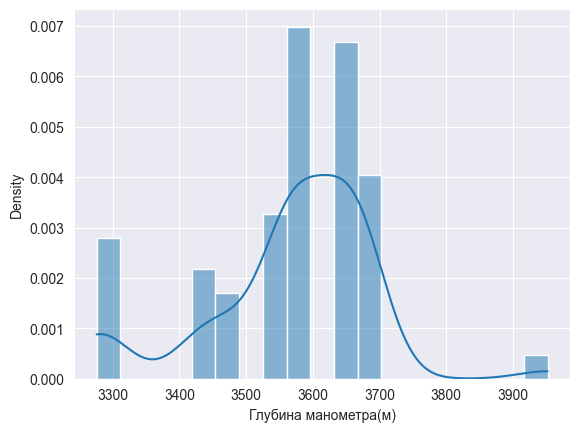

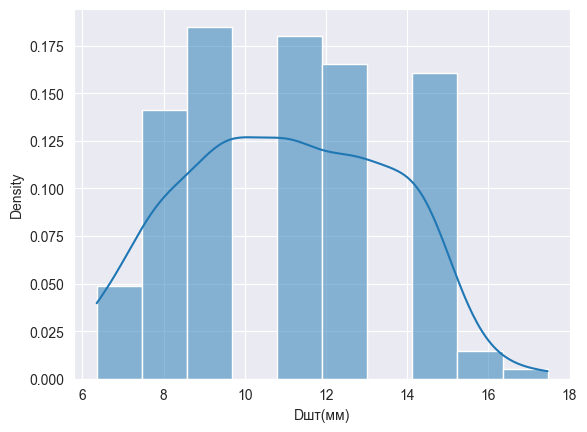

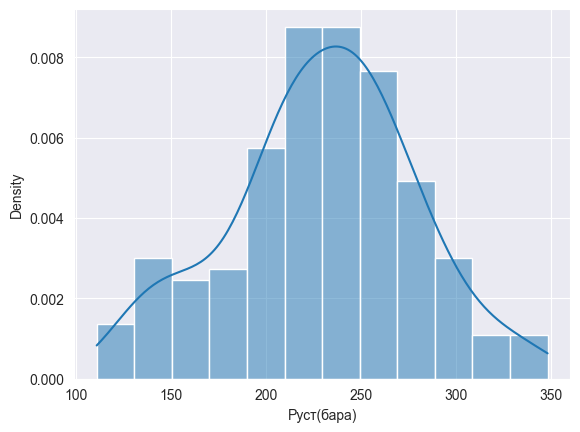

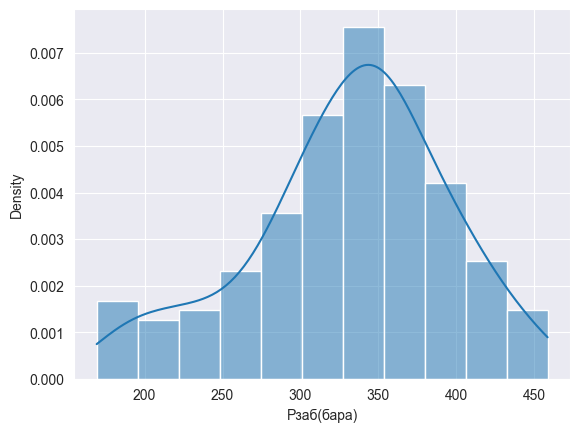

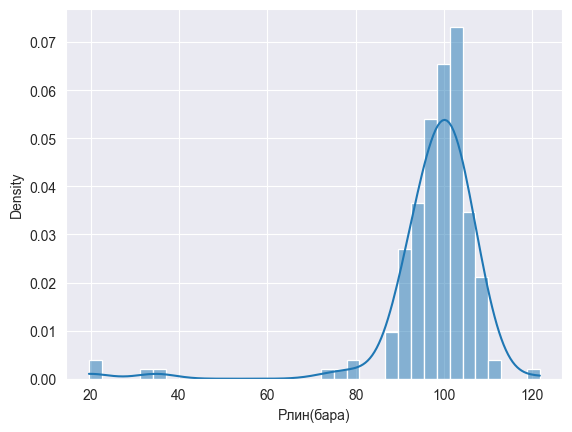

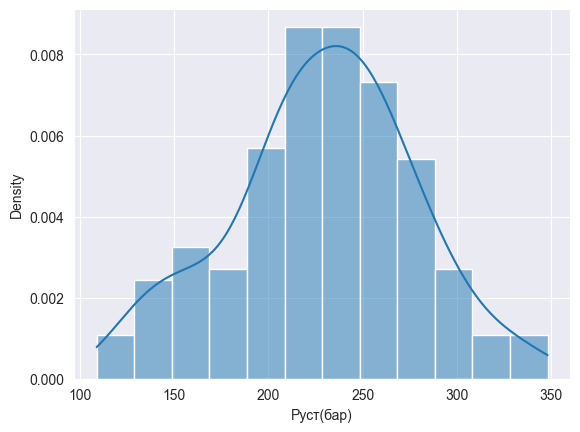

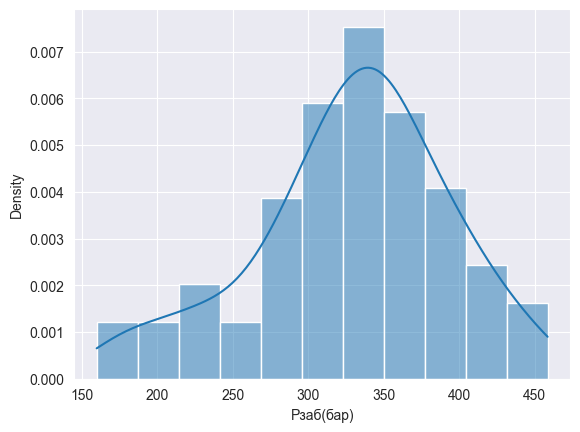

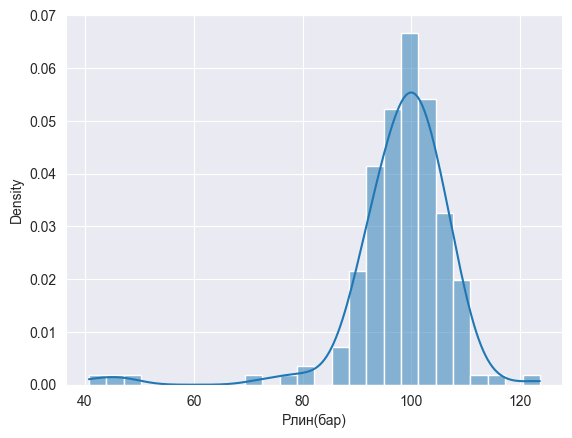

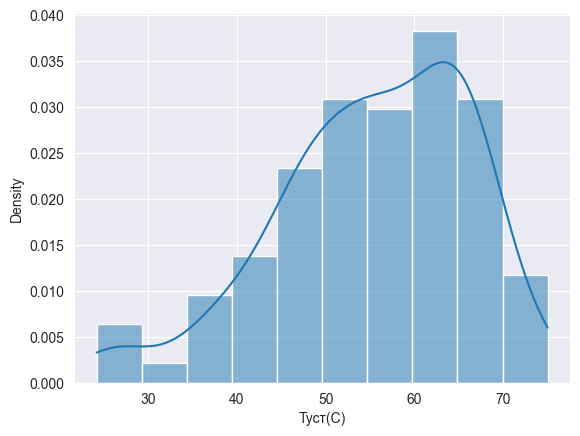

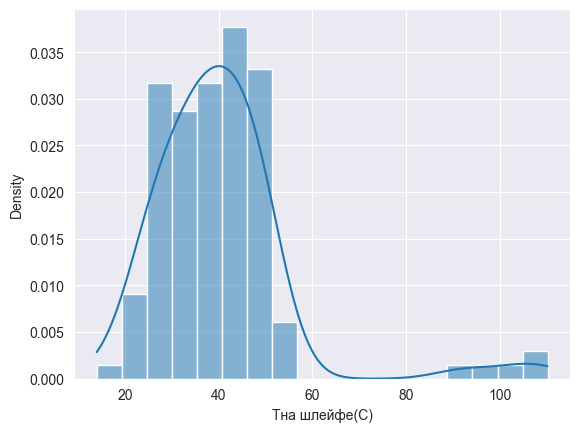

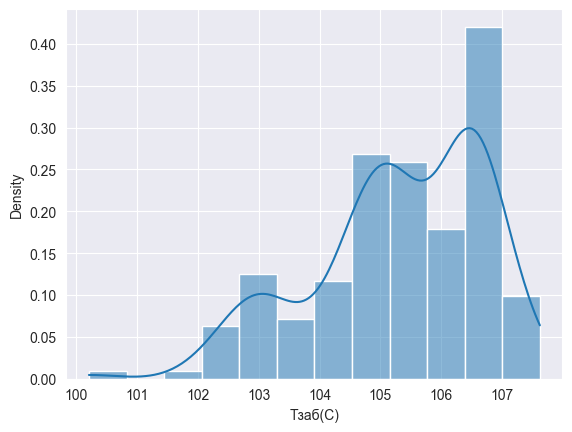

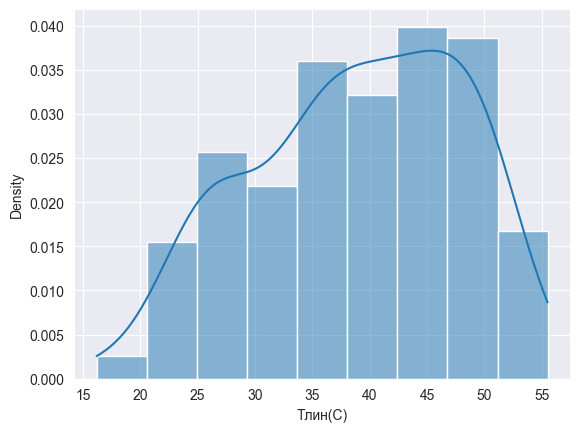

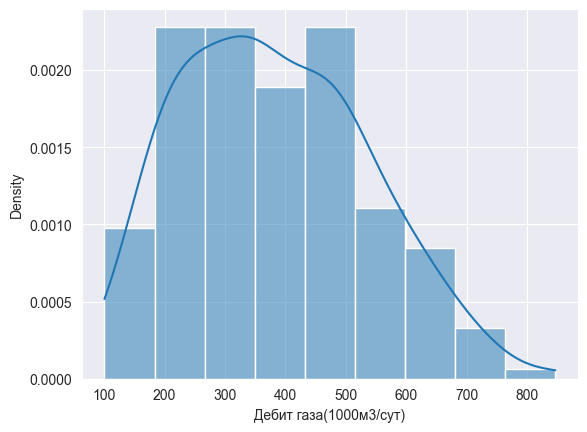

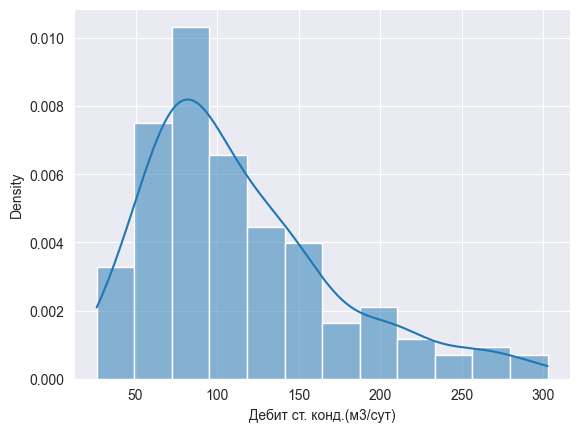

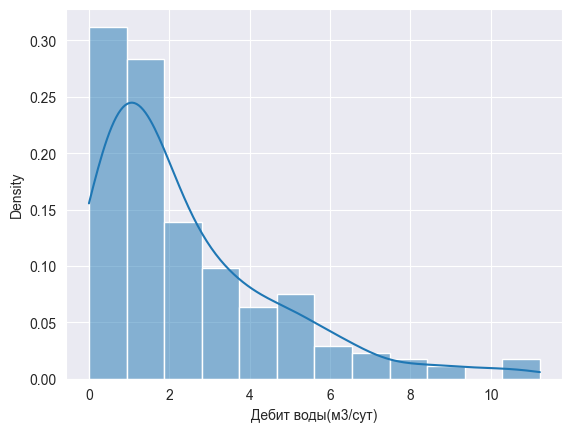

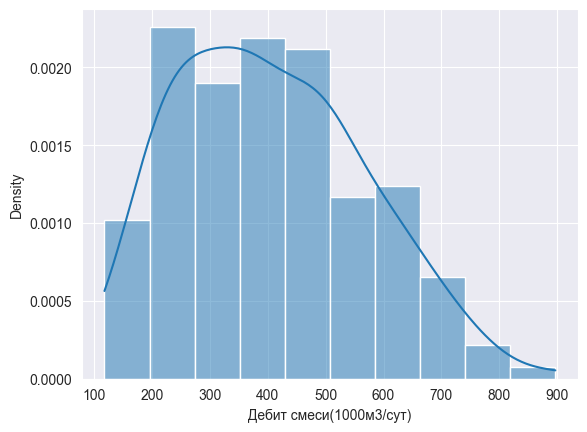

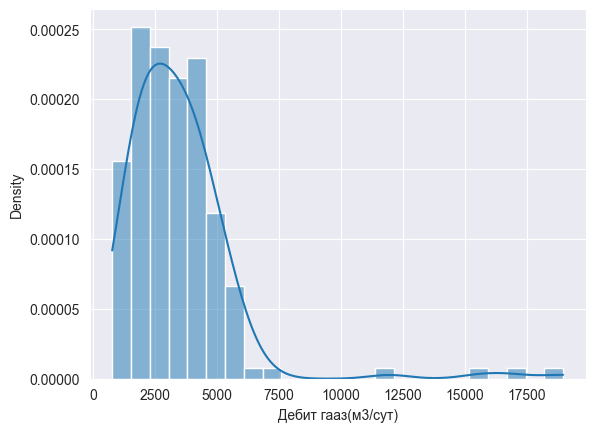

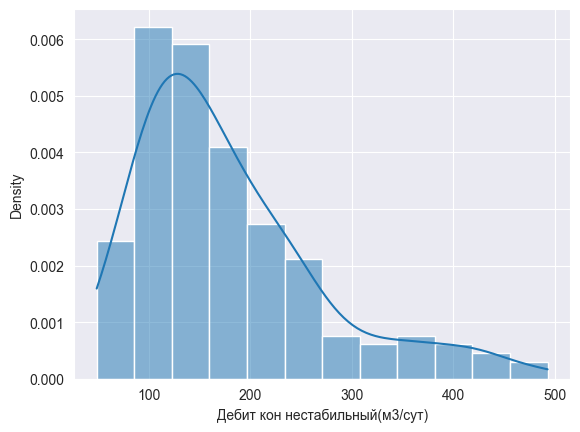

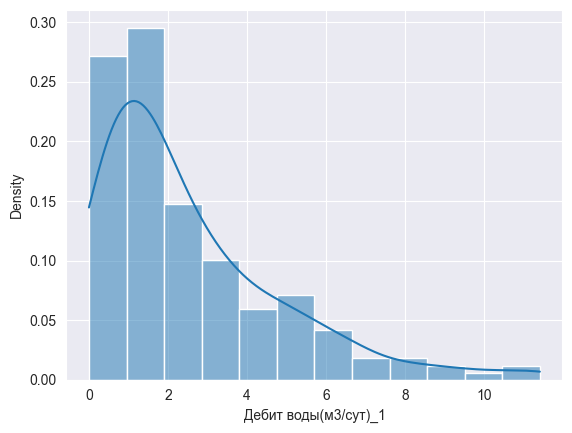

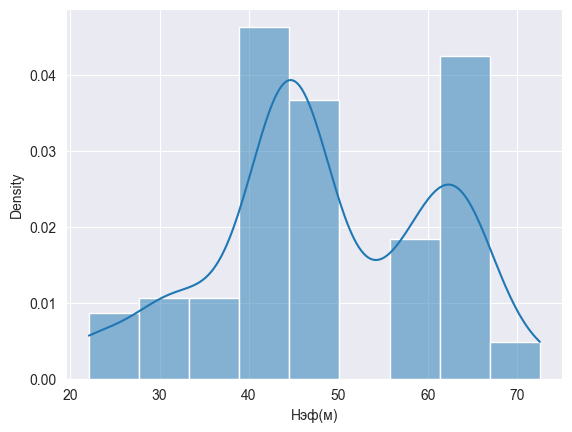

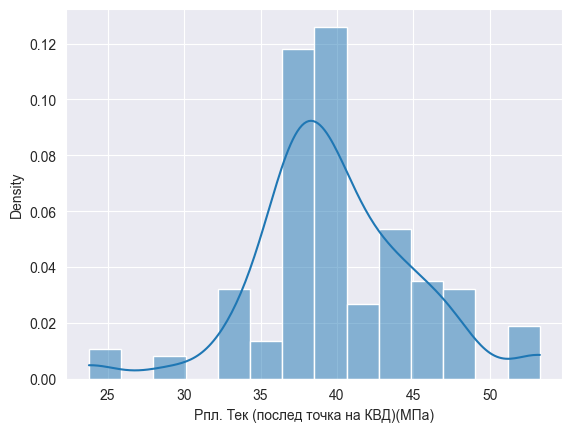

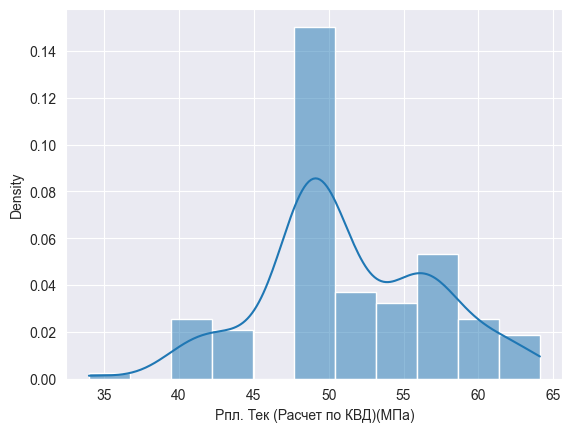

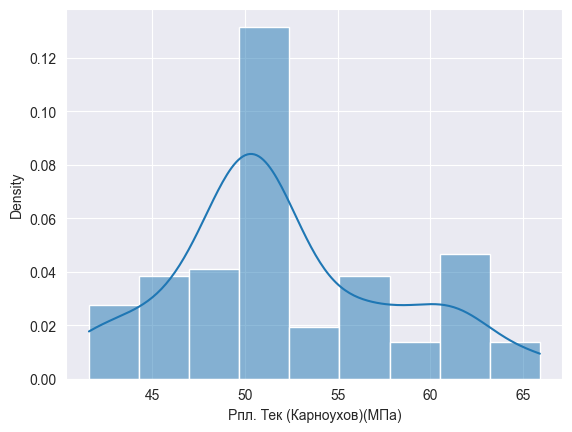

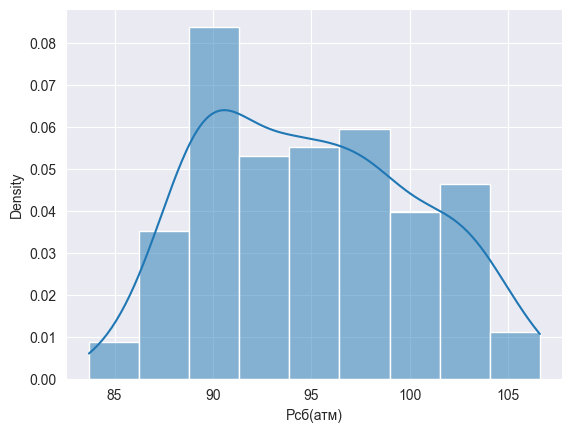

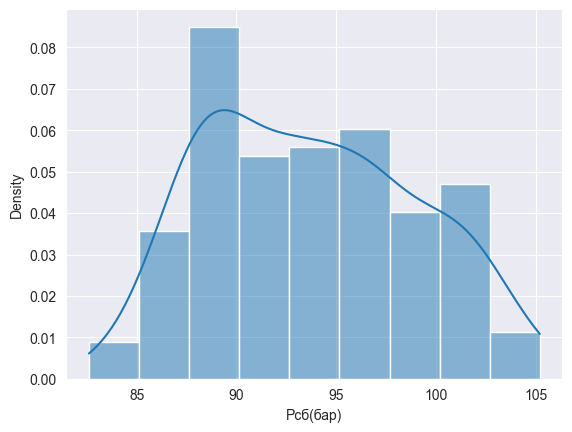

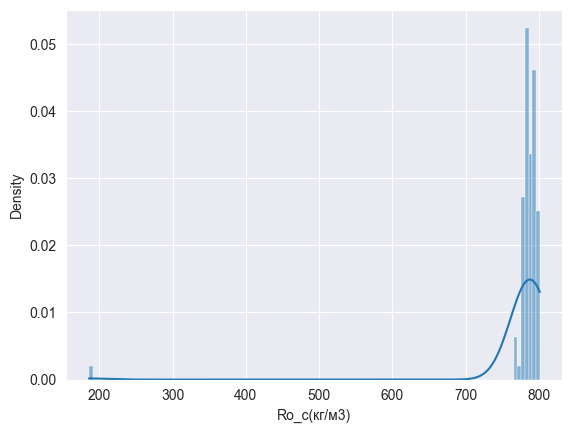

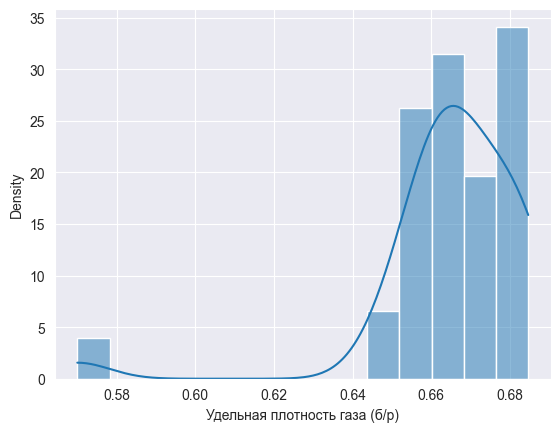

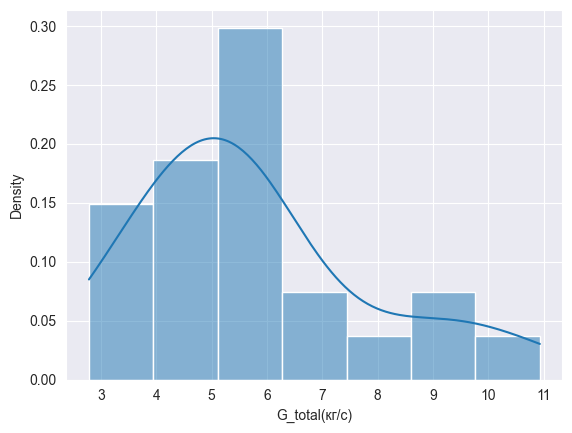

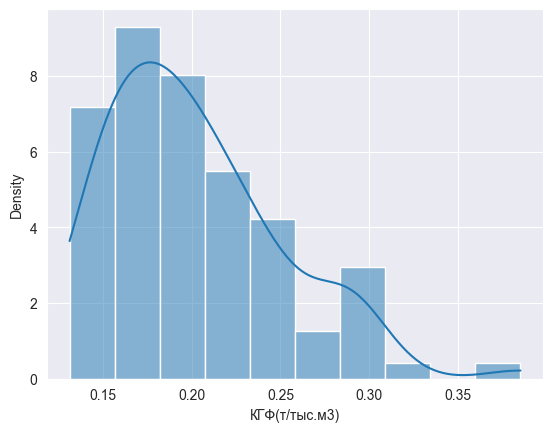

In [299]:
C = len(data_frame.columns)
L = len(data_frame.index)
CN = data_frame.count()  #количество значений не равных Nan
NP = ((L - CN) / L) * 100  #процент пропущенных значений
MN = data_frame.min()  #минимум
Q1 = data_frame.quantile(q=0.25)  #первый квартиль
MA = data_frame.mean()  #среднее значение
ME = data_frame.median()  #медиана
Q3 = data_frame.quantile(q=0.75)  #третий квартиль
MX = data_frame.max()  #максимум
ST = data_frame.std()  #стандартное отклонение
P = data_frame.nunique()  #мощность - количество неповторяющихся значений
IQ = Q3 - Q1  #интерквартильный размах


def draw_distributions(df: pd.DataFrame):
    frame = pd.concat([CN, NP, MN, Q1, MA, ME, Q3, MX, ST, P, IQ], axis=1, join="inner")
    frame = frame.T
    f = pd.DataFrame(frame)
    f.index = ['Количество', 'Процент пропусков', 'Минимум', 'Первый квартиль', 'Среднее', 'Медиана', 'Третий квартиль',
               'Максимум', 'Стандартное отклонение', 'Мощность', 'Интерквартильный размах']
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)

    for i in df.columns:
        plt.figure(i)
        sns.histplot(df[i], kde=True, stat="density")
        # plt.axvline(f.iloc[3][i] - 1.5 * f.iloc[10]["Dшт(мм)"], color="indigo", ls='--')  #q1-1.5*iqr
        # plt.axvline(f.iloc[3][i], color="dodgerblue", ls='--')  #первый квартиль
        # plt.axvline(f.iloc[4][i], color="red", ls='--')  #среднее
        # plt.axvline(f.iloc[5][i], color="goldenrod", ls='--')  #медиана
        # plt.axvline(f.iloc[6][i], color="dodgerblue", ls='--')  #третий квартиль
        # plt.axvline(f.iloc[6][i] + 1.5 * f.iloc[10][i], color="indigo", ls='--')  #q3+1.5*iqr
        plt.show()


draw_distributions(data_frame)

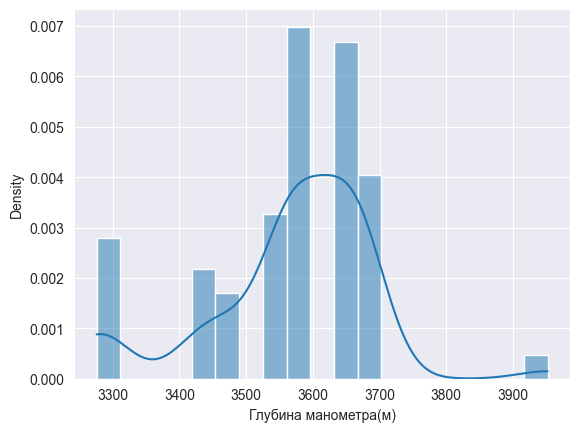

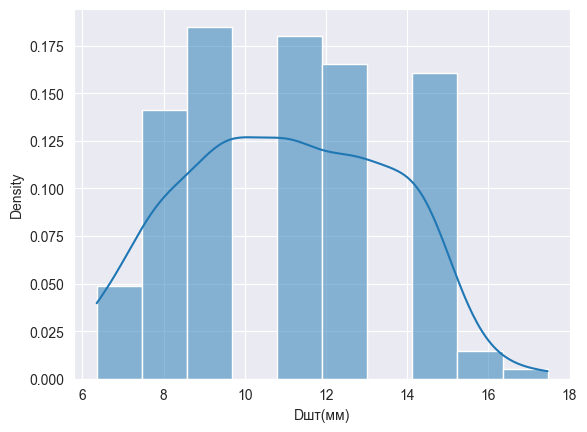

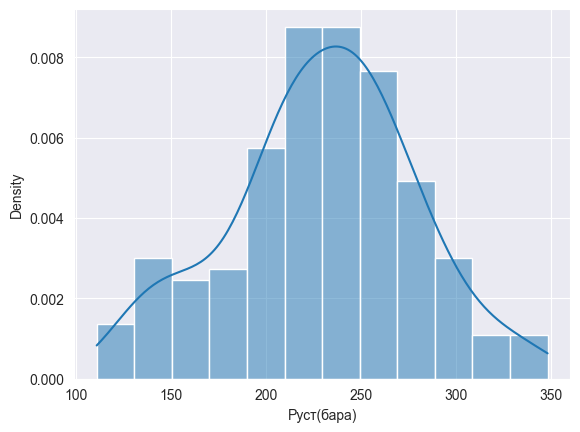

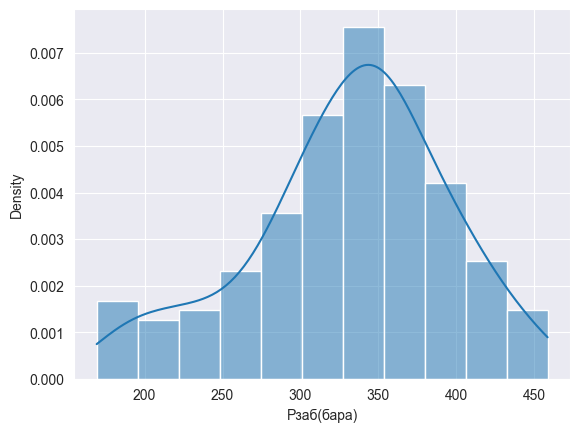

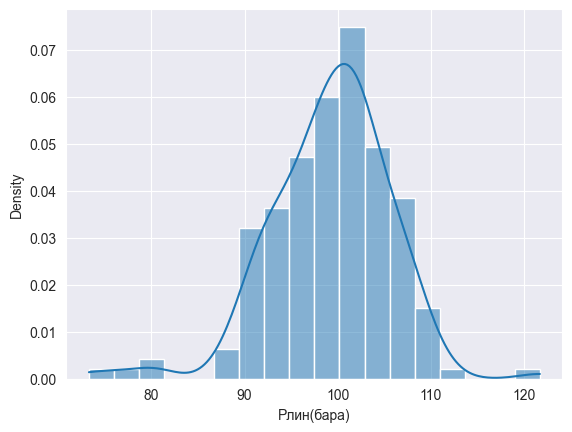

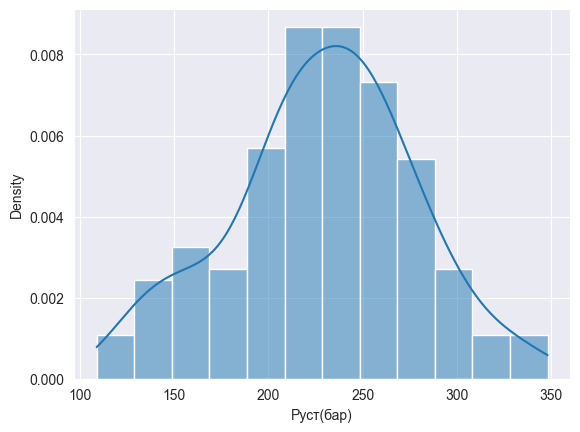

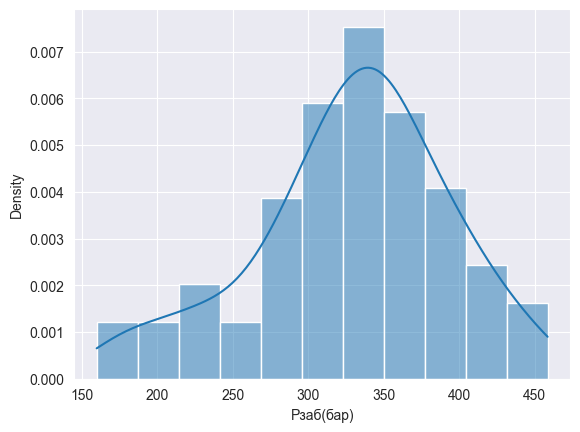

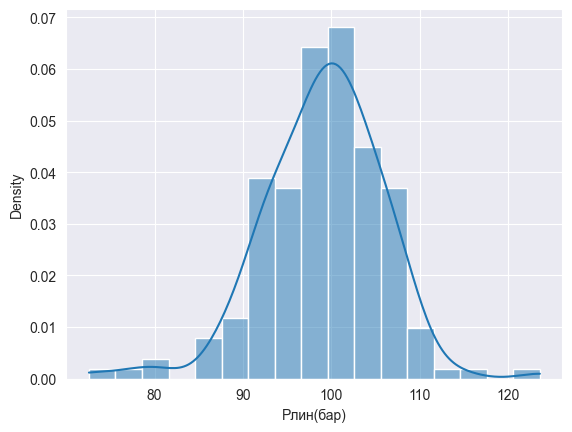

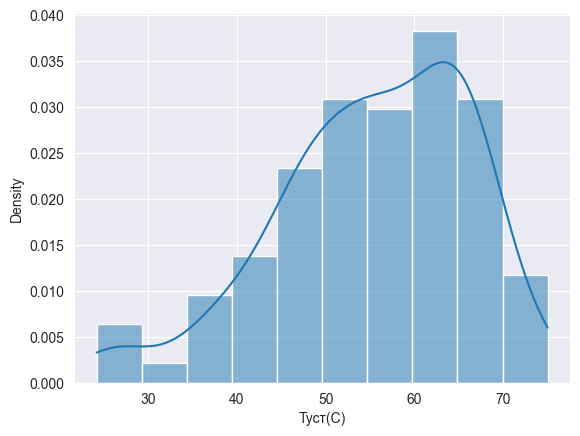

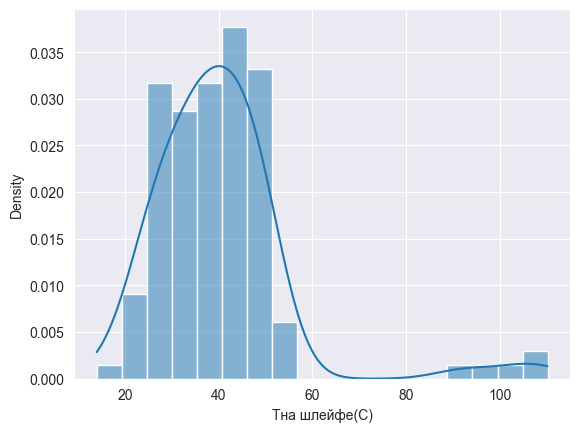

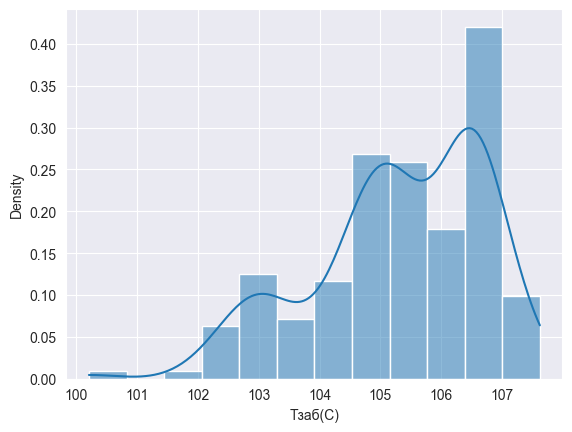

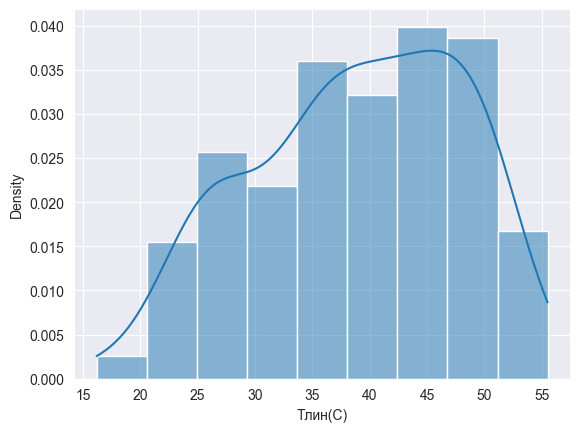

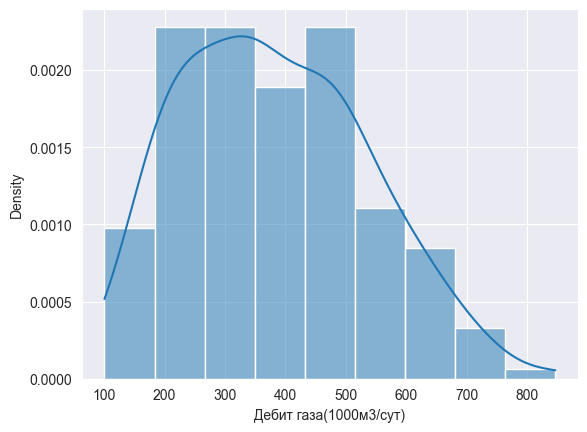

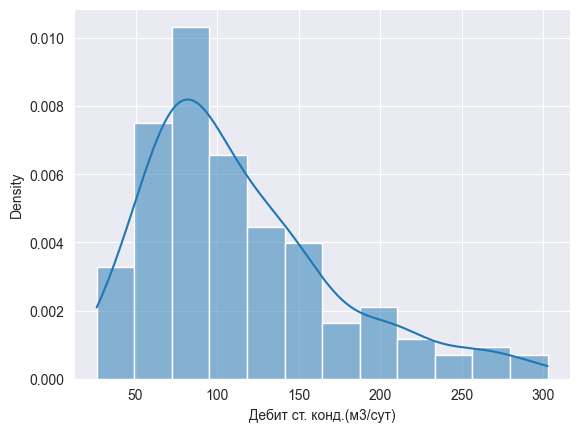

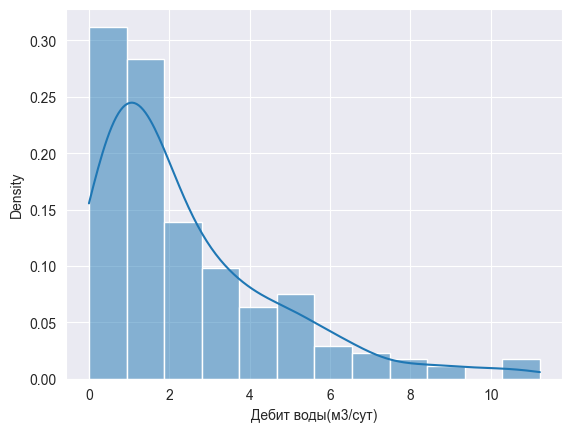

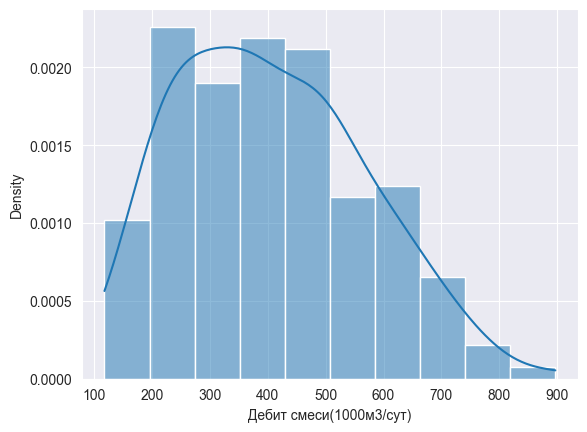

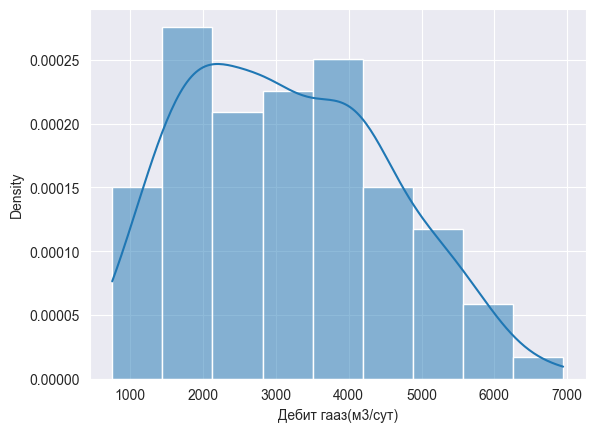

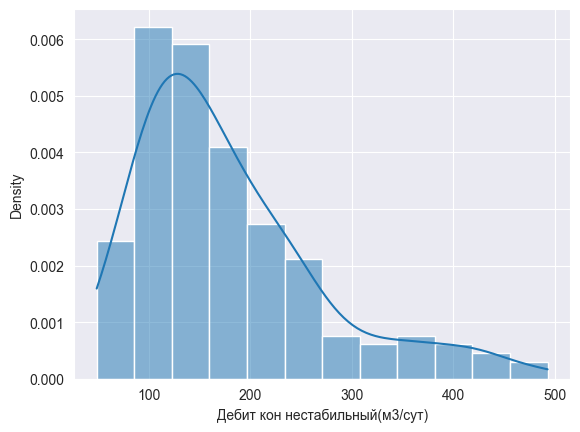

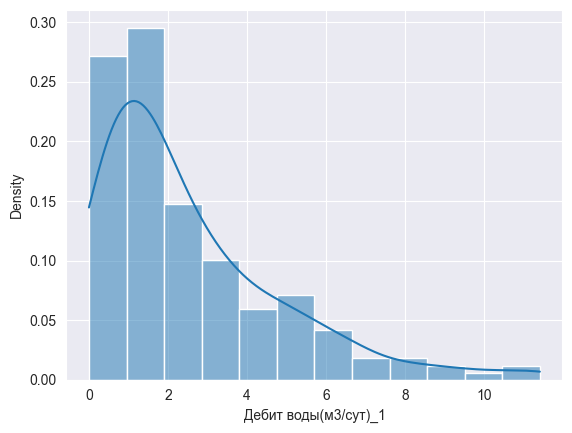

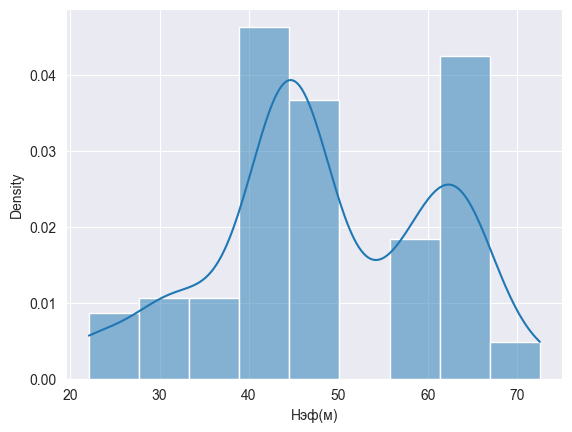

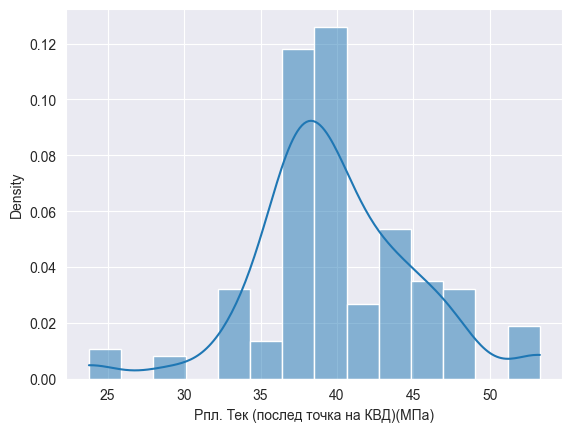

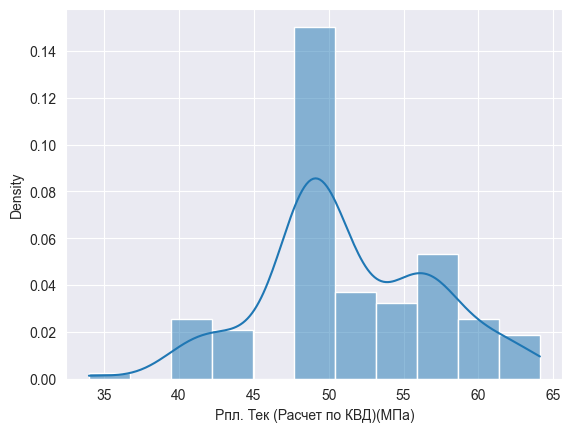

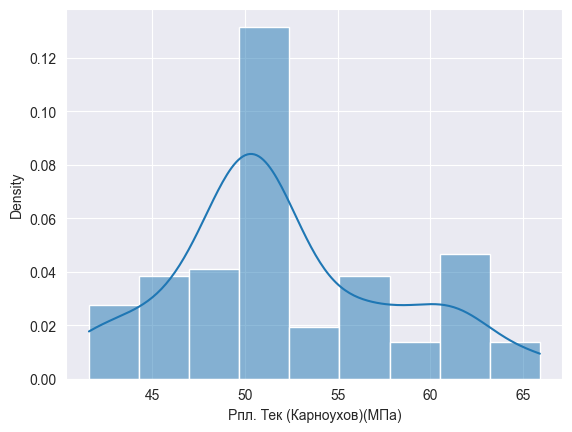

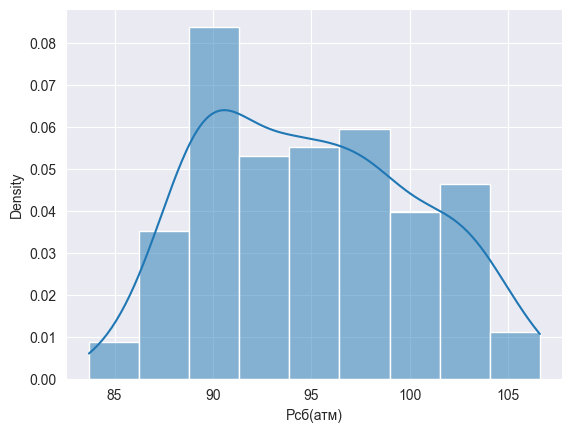

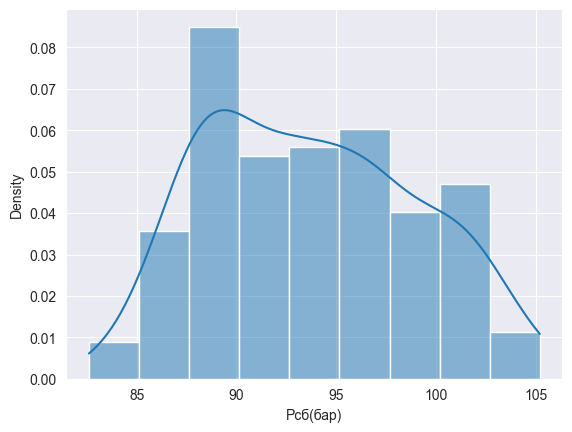

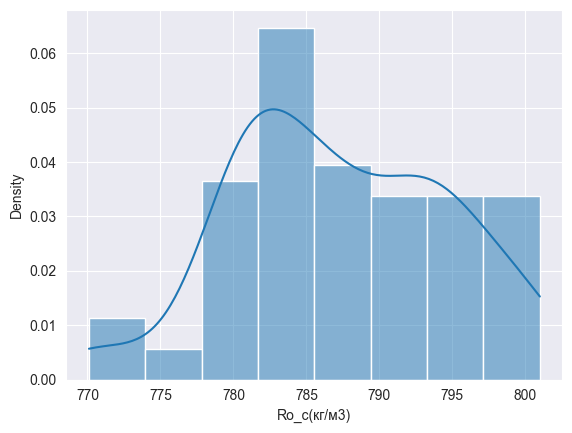

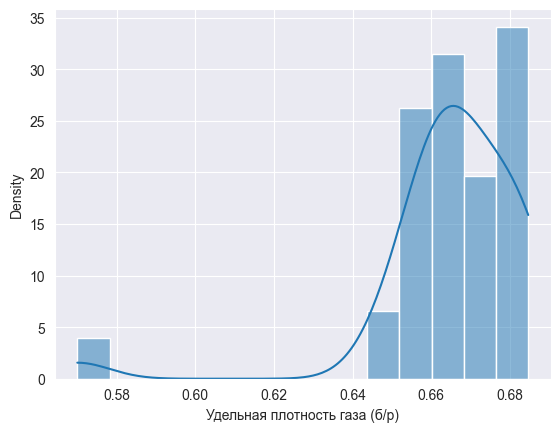

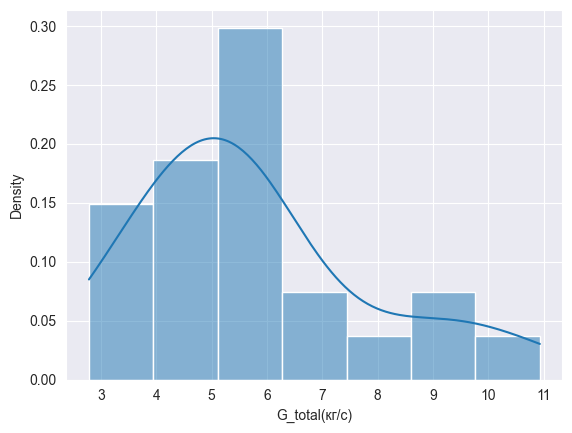

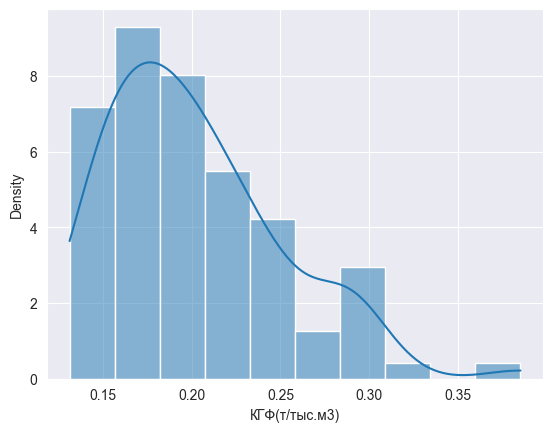

In [300]:
import numpy as np


def replace_emissions(df: pd.DataFrame, column_names: list, lower_bounds: list, upper_bound: list) -> pd.DataFrame:
    index_of_column = 0
    for column in column_names:
        for i in range(0, len(df)):
            if df.iloc[i][column] < lower_bounds[index_of_column] or df.iloc[i][column] > upper_bound[index_of_column]:
                df.iloc[i][column] = np.nan
        index_of_column += 1
    return df


data_frame = replace_emissions(data_frame, ['Pлин(бара)', 'Ro_c(кг/м3)', 'Дебит гааз(м3/сут)', 'Рлин(бар)'], [60, 300, 0, 60],
                               [130, 900, 10000, 130])
draw_distributions(data_frame)

<Axes: >

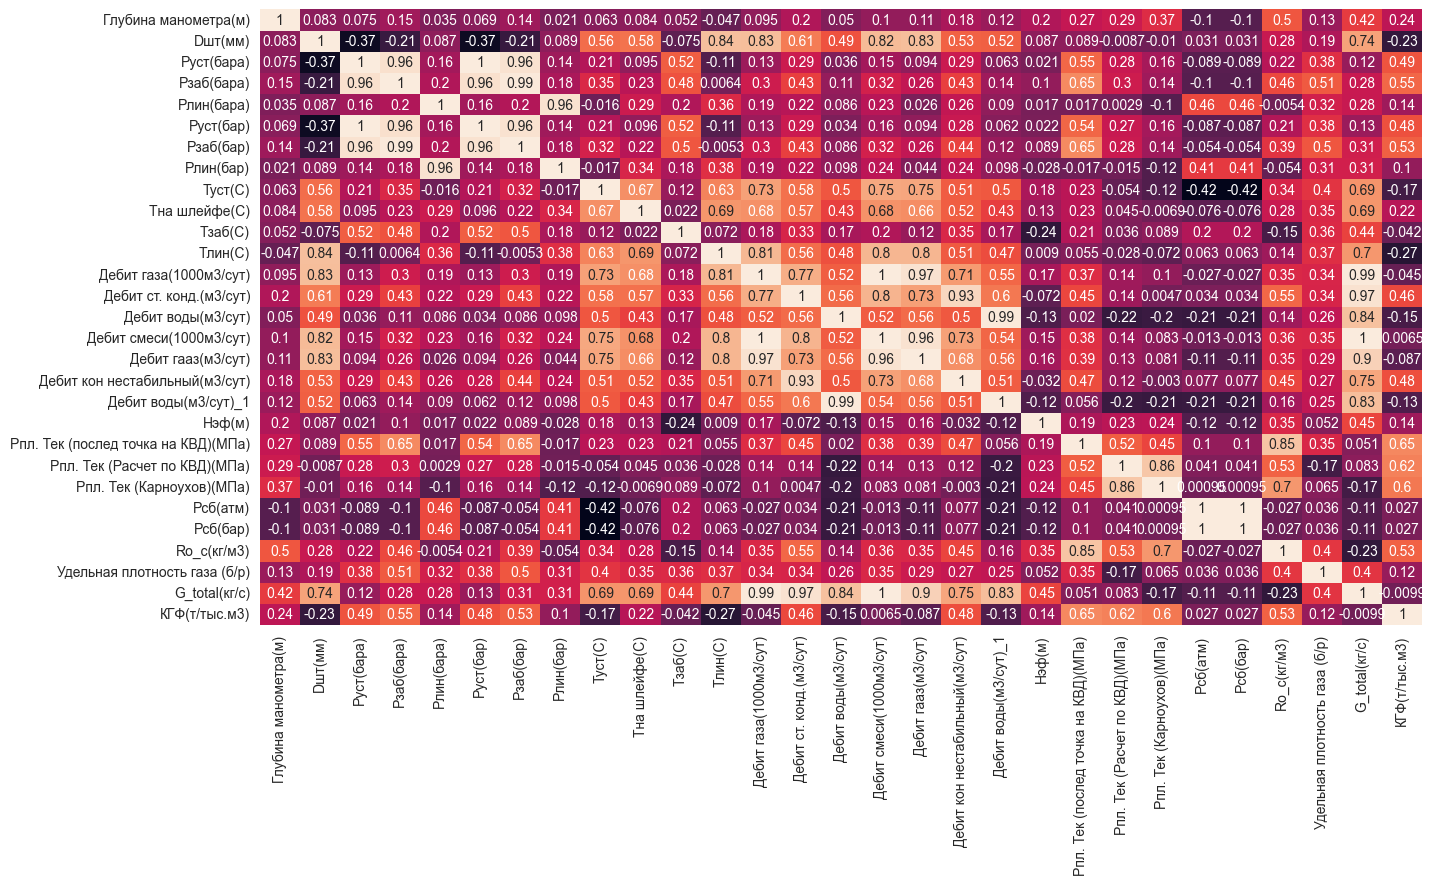

In [301]:
plt.figure(figsize=(15, 8))
sns.heatmap(data_frame.corr(method='pearson', numeric_only=True), annot=True, cbar=False)

<Axes: >

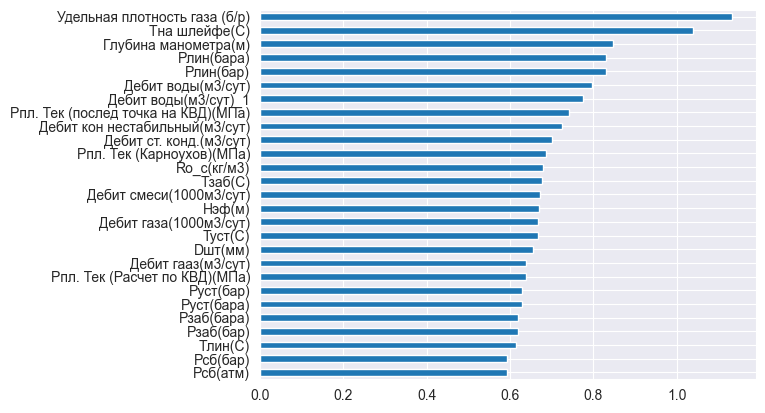

In [302]:
from pandas import Series
from math import isnan
from collections import defaultdict

BASE_OF_LOGARITHM_FOR_GAIN_RATIO = 2

MAX_ALLOWABLE_VALUE_OF_CORR_COEF = 0.95


def calculate_entropy(df: pd.DataFrame, col: str) -> float:
    entropy = 0
    delta = compute_delta(df, col)
    n = compute_num_of_intervals(df, col)
    for i in range(0, n):
        start_interval = df[col].min() + i * delta
        number_of_occurrences = count_values_in_range(df[col], start_interval, start_interval + delta,
                                                      i + 1 == n)
        if number_of_occurrences == 0: continue
        p_i = number_of_occurrences / df[col].count()
        entropy -= p_i * math.log(p_i, BASE_OF_LOGARITHM_FOR_GAIN_RATIO)

    return entropy


def find_rows_with_values_in_interval(df: pd.DataFrame, column_name: str, range_min: float, range_max: float,
                                      is_last_interval: bool) -> list:
    rows = []
    index = 0
    for val in df[column_name]:
        if range_min <= val < range_max:
            rows.append(index)
        if is_last_interval and val == range_max:
            rows.append(index)
        index += 1
    return rows


def compute_num_of_not_null_values_in_both(df: pd.DataFrame, feature_column: str, target_column: str) -> int:
    res = 0
    for i in range(0, len(df)):
        if df.iloc[i][feature_column] is not None and df.iloc[i][target_column] is not None:
            res += 1
    return res


def find_indexes_of_not_null_values(df: pd.DataFrame, column_name: str) -> list:
    indexes = []
    index = 0
    for val in df[column_name]:
        if not isnan(val): indexes.append(index)
        index += 1
    return indexes


def compute_conditional_entropy_with_feature_rows(df: pd.DataFrame, target_column: str, feature_rows: list) -> float:
    entropy = 0
    target_delta = compute_delta(df, target_column)
    n = compute_num_of_intervals(df, target_column)
    for j in range(0, n):
        start_target_interval = df[target_column].min() + j * target_delta
        target_rows = find_rows_with_values_in_interval(df, target_column, start_target_interval,
                                                        start_target_interval + target_delta,
                                                        j + 1 == n)
        rows = list(set(feature_rows) & set(target_rows))
        if len(rows) == 0: continue
        p_i = len(rows) / len(feature_rows)
        entropy -= p_i * math.log(p_i, BASE_OF_LOGARITHM_FOR_GAIN_RATIO)
    return entropy


def calculate_conditional_entropy(df: pd.DataFrame, feature_column: str, target_column: str) -> float:
    conditional_entropy = 0

    feature_delta = compute_delta(df, feature_column)
    n = compute_num_of_intervals(df, feature_column)
    for i in range(0, n):
        start_feature_interval = df[feature_column].min() + i * feature_delta

        feature_rows = find_rows_with_values_in_interval(df, feature_column, start_feature_interval,
                                                         start_feature_interval + feature_delta,
                                                         i + 1 == n)
        feature_rows = list(set(feature_rows) & set(find_indexes_of_not_null_values(df, target_column)))
        if len(feature_rows) == 0: continue

        entropy = compute_conditional_entropy_with_feature_rows(df, target_column, feature_rows)

        num_of_non_null_rows = compute_num_of_not_null_values_in_both(df, feature_column, target_column)
        conditional_entropy += entropy * (len(feature_rows) / num_of_non_null_rows)

    # print('conditional_entropy', conditional_entropy)
    return conditional_entropy


def compute_info_gain_for_target_and_feature(df: pd.DataFrame, feature_column: str, target_column: str) -> float:
    return calculate_entropy(df, target_column) - calculate_conditional_entropy(df, feature_column, target_column)


def compute_split_info_for_feature(df: pd.DataFrame, feature_column: str) -> float:
    split_info = 0
    delta = compute_delta(df, feature_column)
    n = compute_num_of_intervals(df, feature_column)
    for i in range(0, n):
        start_interval = df[feature_column].min() + i * delta
        number_of_occurrences = count_values_in_range(df[feature_column], start_interval, start_interval + delta,
                                                      i + 1 == n)
        if number_of_occurrences == 0: continue
        p_i = number_of_occurrences / df[feature_column].count()
        split_info -= p_i * math.log(p_i, BASE_OF_LOGARITHM_FOR_GAIN_RATIO)
    return split_info


def compute_num_of_intervals(df: pd.DataFrame, column_name: str) -> int:
    return int(1 + math.log(df[column_name].count(), BASE_OF_LOGARITHM_FOR_GAIN_RATIO))


def compute_delta(df: pd.DataFrame, column_name: str) -> float:
    return (df[column_name].max() - df[column_name].min()) / compute_num_of_intervals(df, column_name)


def count_values_in_range(series: Series, range_min: float, range_max: float, is_last_interval: bool) -> int:
    if is_last_interval:
        series.between(left=range_min, right=range_max, inclusive='both').sum()
    return series.between(left=range_min, right=range_max, inclusive='left').sum()


def compute_gain_ratio_for_target_and_feature(df: pd.DataFrame, feature_column: str, target_column: str) -> float:
    return compute_info_gain_for_target_and_feature(df, feature_column, target_column) / compute_split_info_for_feature(
        df, feature_column)


def compute_gain_ratio(df: pd.DataFrame) -> dict:
    gain_ratio = defaultdict(dict)
    for target_column in TARGET_VARIABLES:
        target_gain = {}
        for feature_column in df.columns:
            if feature_column in TARGET_VARIABLES: continue
            target_gain[feature_column] = compute_gain_ratio_for_target_and_feature(df, feature_column, target_column)
        gain_ratio[target_column] = target_gain
    return gain_ratio


def compute_less_important_feature(gain_ratio_dict: dict, first_column_name: str, second_column_name: str) -> str:
    importance_of_first = 0
    importance_of_second = 0
    for target_column in TARGET_VARIABLES:
        importance_of_first += gain_ratio_dict[target_column][first_column_name]
        importance_of_second += gain_ratio_dict[target_column][second_column_name]
    if importance_of_first > importance_of_second:
        return second_column_name
    return first_column_name


def remove_linearly_dependent_features(df: pd.DataFrame) -> pd.DataFrame:
    corr_matrix = df.corr(method='pearson', numeric_only=True)
    gain_ratio_dict = compute_gain_ratio(df)
    for col in corr_matrix.columns:
        if col not in df.columns: continue
        correlating_columns = corr_matrix[col][corr_matrix[col] > MAX_ALLOWABLE_VALUE_OF_CORR_COEF].index.tolist()
        correlating_columns = list(set(correlating_columns))
        # print('correlating_columns', correlating_columns)
        for correlating_column in correlating_columns:
            if col not in df.columns: break
            if correlating_column == col or correlating_column not in df.columns: continue
            if col in TARGET_VARIABLES:
                df = df.drop(correlating_column, axis=COLUMN_AXIS)
            if correlating_column in TARGET_VARIABLES:
                df = df.drop(col, axis=COLUMN_AXIS)
                break
            less_important_column = compute_less_important_feature(gain_ratio_dict, col, correlating_column)
            if less_important_column in df.columns:
                df = df.drop(less_important_column, axis=COLUMN_AXIS)
    return df


importance = pd.Series(compute_gain_ratio(data_frame)[TARGET_VARIABLES[0]]).sort_values()
importance.plot(kind='barh')

<Axes: >

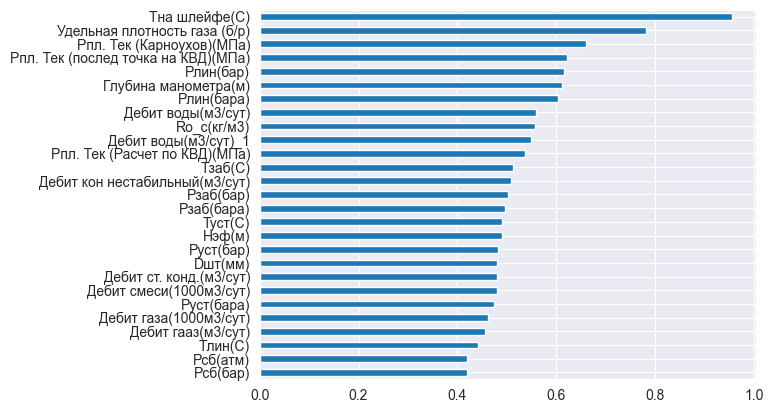

In [303]:
importance = pd.Series(compute_gain_ratio(data_frame)[TARGET_VARIABLES[1]]).sort_values()
importance.plot(kind='barh')

In [304]:
data_frame = remove_linearly_dependent_features(data_frame)
data_frame

Глубина манометра(м)  Dшт(мм)   Рзаб(бар)   Рлин(бар)  Туст(С)  \
2                  3576.3     7.94  359.600000  101.800000     53.0   
3                  3576.3     9.53  338.100000  102.400000     58.8   
4                  3576.3    11.11  314.800000  100.600000     63.6   
5                  3576.3    12.70  291.500000   99.000000     64.7   
6                  3576.3    14.29  270.300000   99.500000     64.0   
7                  3576.3     9.53  286.600000  106.190000     57.5   
8                  3590.0     7.93  391.823775         NaN     46.0   
9                  3590.0    11.11  384.224400         NaN     56.0   
10                 3590.0    14.28  371.912399         NaN     63.0   
11                 3590.0    17.46  346.192061         NaN     65.0   
12                 3667.0     7.94  354.200000  101.565484     56.0   
13                 3667.0     9.53  349.100000  103.322581     61.0   
14                 3667.0    11.11  344.100000  105.588710     65.0   
15                 3667.0    12.70  343.000000  108.144839     42.0   
16                 3579.0     7.94  365.900000  101.420323     52.0   
17                 3579.0     9.53  342.300000  104.180000     58.0   
18                 3579.0    11.11  312.300000  103.000000     61.0   
19                 3579.0    12.70  291.700000  103.917419     62.0   
20                 3579.0    14.29  263.000000  107.536667     63.0   
21                 3582.5     9.53  292.000000  105.030000     56.0   
22                 3653.0     7.94  442.700000   99.167355     37.0   
23                 3653.0     9.53  388.600000   86.747194     48.0   
24                 3653.0    12.70  308.700000   92.457903     54.0   
25                 3653.0    14.29  270.400000   81.146774     52.0   
26                 3653.0    15.88  239.300000   79.541129     51.0   
27                 3653.0    14.29  285.300000   72.579258     50.0   
28                 3653.0    11.11  296.800000   76.819516     50.0   
29                 3650.0     7.94  458.500000   89.433677     60.0   
30                 3650.0     9.53  452.700000   98.179065     66.0   
31                 3650.0    12.70  437.200000  105.977097     74.0   
32                 3650.0    14.29  426.100000  106.771290     75.0   
33                 3650.0    15.87  413.900000  109.390323     75.0   
34                 3650.0    14.29  414.700000  108.640000     74.0   
35                 3650.0    11.11  424.500000  102.254286     70.0   
36                 3653.0     9.53  402.900000  111.612903     64.0   
37                 3653.0    11.11  396.600000  123.616800     68.0   
38                    NaN    14.29         NaN  106.770000     69.0   
39                 3572.0     6.35  345.000000  114.700000     25.0   
40                 3572.0     9.53  328.700000  103.800000     31.0   
41                 3572.0    11.11  316.100000  108.700000     37.0   
42                 3572.0    12.70  329.700000  108.400000     37.0   
43                 3588.5     7.94  359.900000  100.200000     57.0   
44                 3588.5     9.53  346.900000   98.800000     62.0   
45                 3588.5    11.11  330.500000   93.100000     66.0   
46                 3588.5    12.70  314.200000   97.000000     68.0   
47                 3588.5    14.29  297.500000   98.300000     68.0   
48                 3588.5    12.70  306.800000   97.600000     67.0   
49                    NaN     9.53         NaN  100.260000     58.0   
50                 3559.5     6.35  396.700000   99.030750     49.6   
51                 3559.5     9.53  386.800000  100.650440     59.9   
52                 3559.5    12.70  373.900000  102.065870     66.8   
53                 3559.5    14.29  372.800000  101.153010     68.5   
54                 3570.0     7.94  379.200000   88.880850     52.0   
55                 3570.0     9.53  373.000000   91.437140     58.0   
56                 3570.0    11.11  365.100000   94.226270     64.0   
57                 3570.0    

<Axes: >

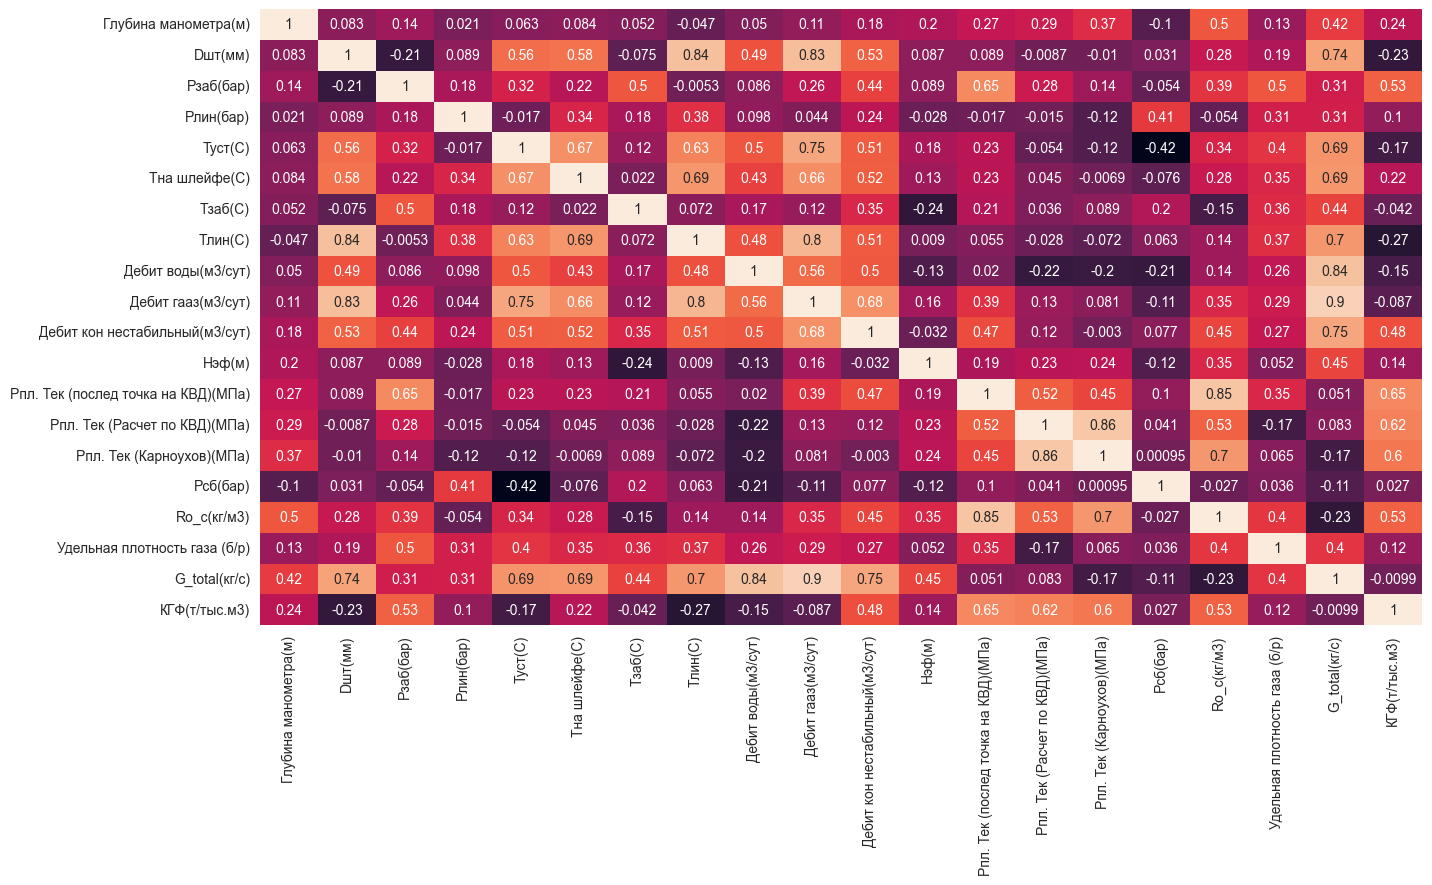

In [305]:
plt.figure(figsize=(15, 8))
sns.heatmap(data_frame.corr(method='pearson', numeric_only=True), annot=True, cbar=False)